<img src='dts.png' width='150' align='left'>
<img src='unud.png' width='100' align='right'>
<h1 display = inline style='text-align: center; color: #01174b; font-family: Montserrat;font-size:50px'>Heart Failure Prediction</h1>

<h1 display = inline style='text-align: center;font-size:30px'>Introduction</h1>

<span class="mark">Cardiovascular diseases (CVDs) are the number 1 cause of death globally</span>, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. This dataset contains 12 features that can be used to predict mortality by heart failure. People with cardiovascular disease or who are at high cardiovascular risk need <span class="mark">early detection and management wherein a machine learning model can be of great help.</span>

__<span class="mark">Penyakit terkait kardiovaskular (CVD) adalah penyebab kematian nomor satu di dunia</span>, sekitar 17.9 juta nyawa setiap tahun, yang mana tercatat 31% dari kematian di seluruh dunia. Kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi memerlukan <span class="mark">deteksi dan pengelolaan dini di mana model machine learning dapat sangat membantu.</span>__

<h1 display = inline style='text-align: center;font-size:30px'>Objective</h1>

### Create a model to assess the likelihood of a death by heart failure event.
This can be used to help hospitals in assessing the severity of patients with cardiovascular diseases. 

<h1 display = inline style='text-align: center;font-size:30px'>Daftar Isi</h1>


<div style='background-color:white;font-size:15px'>    
    
* [A. Data Preparation](#preparation)
    
* [B. Modelling](#model)
    
* [C. Summary](#summary)
    
</div>

<div>
    <h1 style='font-size:30px'> A. Data Preparation </h1>
    <a class='anchor' id='preparation'></a>
</div>

## A.1 Import Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random2 as random

warnings.filterwarnings('ignore')
color = [
    '#00876c', '#57a18b', '#8cbcac', '#bed6ce', '#f1f1f1', '#f1c6c6',
    '#ec9c9d', '#e27076', '#d43d51'
]

%matplotlib inline

## A.2 Data Gathering

Reading data `heart_failure.csv` from (kaggle: Heart Failure Prediction -
12 clinical features por predicting death events)

In [48]:
df = pd.read_csv('heart_failure.csv')
df.info()  # .info function generated for knowing the features and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


## A.3 Check the data whether it's Null or not

In [49]:
print(df.isnull().any())

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool


The data is completely **clean**, therefore, no need to refine it.

## A.4 Split the data into Numerical and Categorical

In [50]:
num_features = df.select_dtypes([np.number]).columns.tolist()
print('Number of Numerical Features : ', len(num_features))
print('those are :\n\n', num_features,"\n")
cat_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
print('Number of Categorical Features : ', len(cat_features))
print('those are :\n\n', cat_features)

Number of Numerical Features :  13
those are :

 ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT'] 

Number of Categorical Features :  0
those are :

 []


In [51]:
df[num_features].head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


From Objective above we know that **Dependend Variable (Target Variable) : `DEATH_EVENT`**

### According to data, we know there are more than 1 columns that have boolean property [0, 1]
Finding the binary columns

In [52]:
col_biner = [x for x in df if np.isin(df[x].unique(), [0, 1]).all()]
print('Binary Column :\n',col_biner)
col_nonbiner = df.loc[:,~df.columns.isin(col_biner)].columns.tolist()
print('\nNon-Binary Column :\n',col_nonbiner)

Binary Column :
 ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

Non-Binary Column :
 ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


Definition of binary datas :

1. 'anaemia'              | 0 = No, 1 = Yes
2. 'diabetes'             | 0 = No, 1 = Yes
3. 'high_blood_pressure'  | 0 = No, 1 = Yes
4. 'sex'                  | 0 = Female, 1 = Male
5. 'smoking'              | 0 = No, 1 = Yes
6. 'DEATH_EVENT'          | 0 = No, 1 = Yes

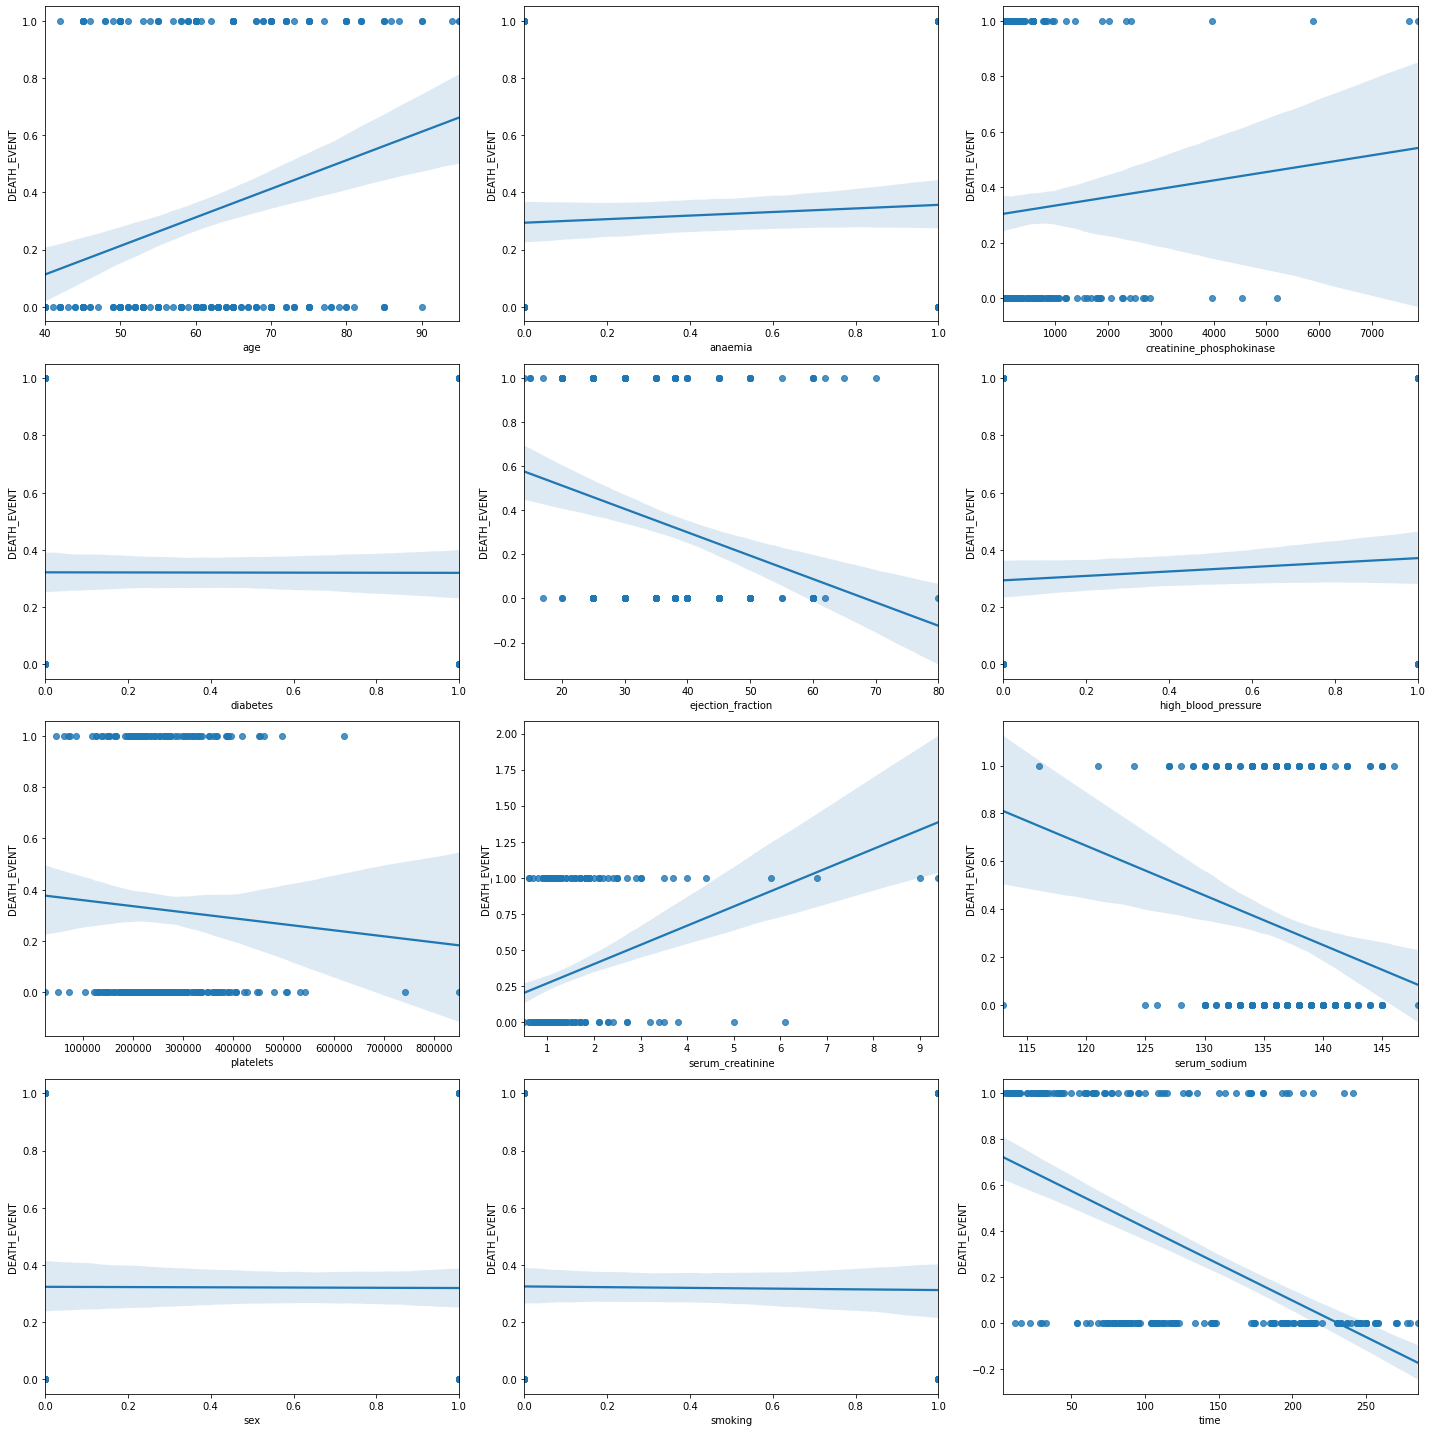

In [53]:
fig, ax = plt.subplots(4,3, figsize=(20,20))
for variable, subplot in zip(num_features[0:-1], ax.flatten()):
    sns.regplot(x= df[variable], y = df['DEATH_EVENT'], ax = subplot)
plt.tight_layout()

<AxesSubplot:>

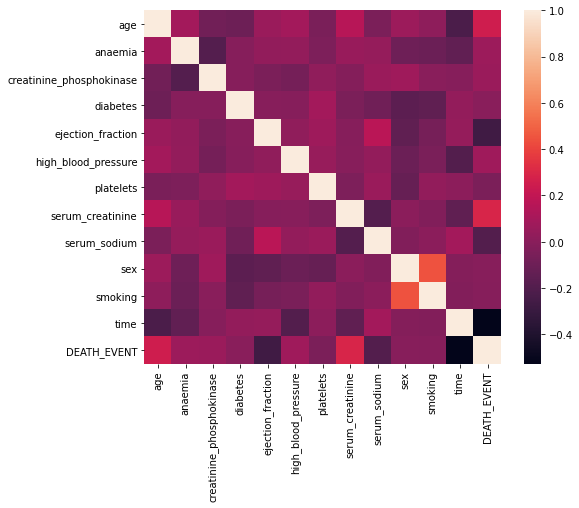

In [54]:
plt.figure(figsize=(8,6.5))
sns.heatmap(df.corr())

## Survivability Distribution

Text(0.5, 1.0, 'Survivability')

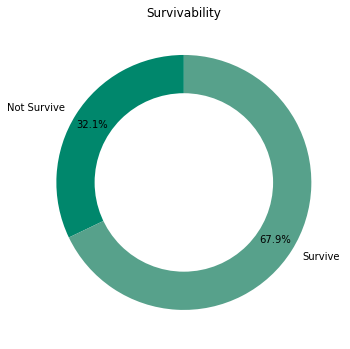

In [69]:
def makepie(xx=None, data=None, colors=color, labels=None, explode=None,axes=None):
    axes.pie(x=xx,
            data=data,
            colors=color,
            startangle=90,
            pctdistance=0.85,
            labels=labels,
            explode=explode,
            autopct='%1.1f%%')
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

death = df[df['DEATH_EVENT']==1]['DEATH_EVENT'].count()
alive = df[df['DEATH_EVENT']==0]['DEATH_EVENT'].count()
tdf = pd.DataFrame({'status':['Not Survive','Survive'],'count':[death,alive]})
tdf = tdf.set_index('status')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
makepie(xx='count',
        data=tdf,
        labels=tdf.index,axes=ax)
plt.tight_layout()
plt.title('Survivability')

## Survivability of Gender

In [55]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% \n ({v:d})'.format(p=pct,v=val)
    return my_autopct

def binaryplot(factor=None, unique = None, labels=None, title=None):
    print('First Grouping :')
    pos = df[df[factor]==1]
    print('Number of', unique[0],'is', len(pos))
    neg = df[df[factor]==0]
    print('Number of', unique[1],'is', len(neg))

    pos_survive = pos[df['DEATH_EVENT']==0]
    pos_notsurvive = pos[df['DEATH_EVENT']==1]

    neg_survive = neg[df['DEATH_EVENT']==0]
    neg_notsurvive = neg[df['DEATH_EVENT']==1]
    
    print('\nSecond Grouping :')
    print('Number of', unique[0],'that are survived is', len(pos_survive))
    print('Number of', unique[0],'that are not survived is', len(pos_notsurvive))
    print('Number of', unique[1],'that are survived is', len(neg_survive))
    print('Number of', unique[1],'that are not survived is', len(neg_notsurvive))

    labels = labels
    values = [len(pos_survive), len(pos_notsurvive),
             len(neg_survive), len(neg_notsurvive)]

    fig = plt.figure(figsize=(8, 8))
    plt.pie(x=values,
            colors=random.sample(color, 4),
            startangle=90,
            pctdistance=0.85,
            labels=labels,
            autopct=make_autopct(values))
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title, fontsize = 20)

First Grouping :
Number of Male is 194
Number of Female is 105

Second Grouping :
Number of Male that are survived is 132
Number of Male that are not survived is 62
Number of Female that are survived is 71
Number of Female that are not survived is 34


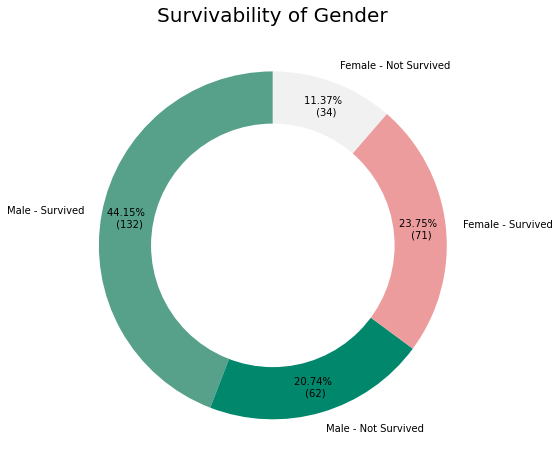

In [56]:
binaryplot(factor='sex',
           unique = ['Male', 'Female'],
           labels=[
               'Male - Survived',
               'Male - Not Survived',
               'Female - Survived',
               'Female - Not Survived'
           ],
           title='Survivability of Gender')

## Survivability of Diabetes

First Grouping :
Number of Positive is 125
Number of Negative is 174

Second Grouping :
Number of Positive that are survived is 85
Number of Positive that are not survived is 40
Number of Negative that are survived is 118
Number of Negative that are not survived is 56


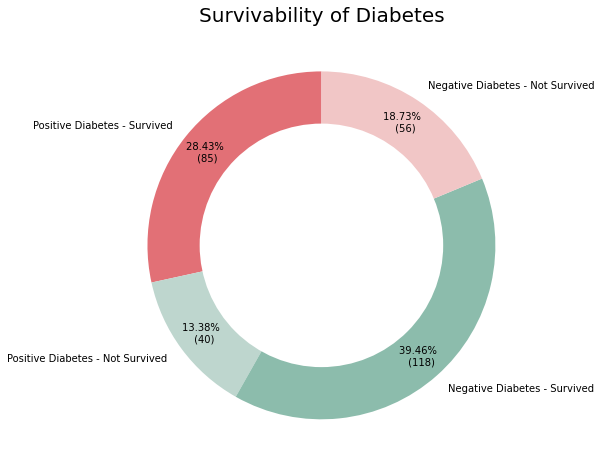

In [57]:
binaryplot(factor='diabetes',
           unique = ['Positive', 'Negative'],
           labels=[
               'Positive Diabetes - Survived',
               'Positive Diabetes - Not Survived',
               'Negative Diabetes - Survived',
               'Negative Diabetes - Not Survived'
           ],
           title='Survivability of Diabetes')

## Survivability of Anaemia

First Grouping :
Number of Positive is 129
Number of Negative is 170

Second Grouping :
Number of Positive that are survived is 83
Number of Positive that are not survived is 46
Number of Negative that are survived is 120
Number of Negative that are not survived is 50


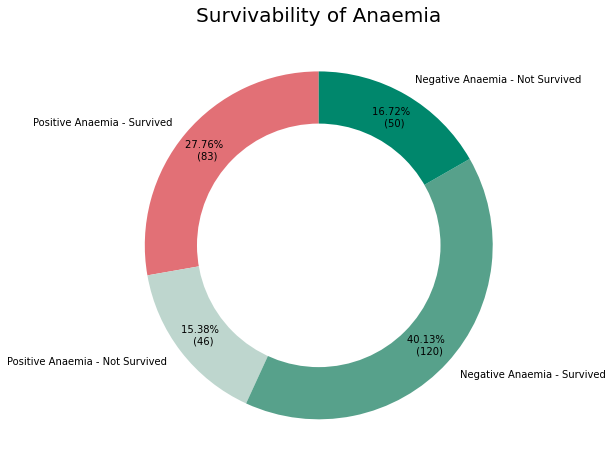

In [58]:
binaryplot(factor='anaemia',
           unique = ['Positive', 'Negative'],
           labels=[
               'Positive Anaemia - Survived',
               'Positive Anaemia - Not Survived',
               'Negative Anaemia - Survived',
               'Negative Anaemia - Not Survived'
           ],
           title='Survivability of Anaemia')

## Survivability of High Blood Pressure Patient

First Grouping :
Number of Positive is 105
Number of Negative is 194

Second Grouping :
Number of Positive that are survived is 66
Number of Positive that are not survived is 39
Number of Negative that are survived is 137
Number of Negative that are not survived is 57


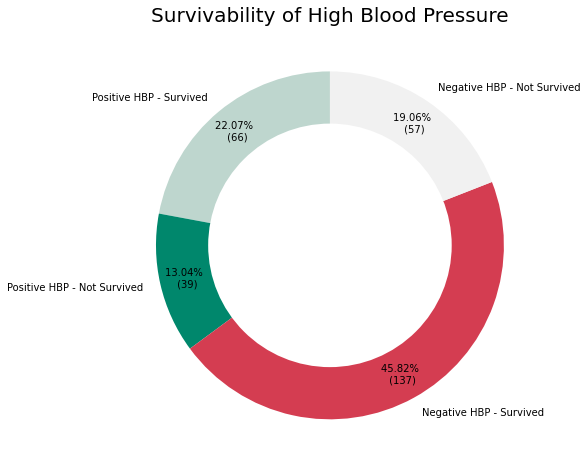

In [59]:
binaryplot(factor='high_blood_pressure',
           unique = ['Positive', 'Negative'],
           labels=[
               'Positive HBP - Survived',
               'Positive HBP - Not Survived',
               'Negative HBP - Survived',
               'Negative HBP - Not Survived'
           ],
           title='Survivability of High Blood Pressure')

## Survivability of Smoking Factor

First Grouping :
Number of Smoke is 96
Number of Not Smoke is 203

Second Grouping :
Number of Smoke that are survived is 66
Number of Smoke that are not survived is 30
Number of Not Smoke that are survived is 137
Number of Not Smoke that are not survived is 66


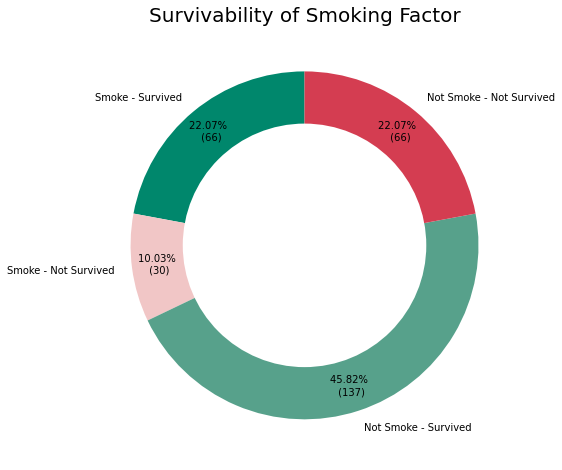

In [60]:
binaryplot(factor='smoking',
           unique = ['Smoke', 'Not Smoke'],
           labels=[
               'Smoke - Survived',
               'Smoke - Not Survived',
               'Not Smoke - Survived',
               'Not Smoke - Not Survived'
           ],
           title='Survivability of Smoking Factor')

## Survivability of Age Distribution

In [61]:
def makedist(factor=None, bins = 50, xlabel = None, title = None):
    f, ax = plt.subplots(1,1, figsize=(15,5))
    survive = df[df['DEATH_EVENT']==0][factor]
    not_survive = df[df['DEATH_EVENT']==1][factor]
    hist_data = [survive,not_survive]
    for x in hist_data:
        sns.distplot(x, bins = bins, kde='True', ax=ax).set(xlabel=xlabel, ylabel='Density')
    plt.title(title,fontsize = 20)
    plt.legend(labels=['Survive', 'Not Survive'])

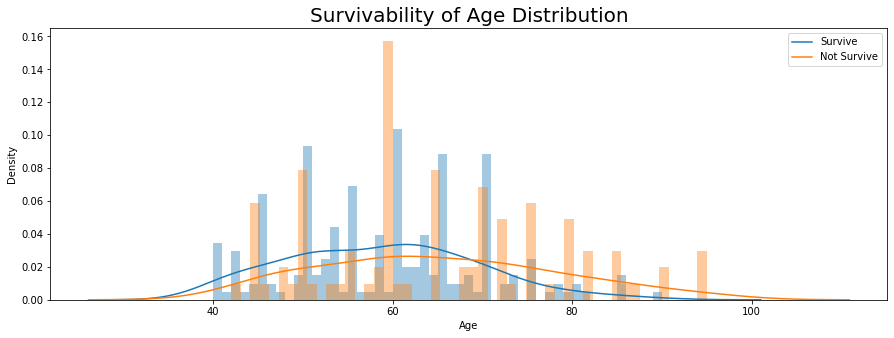

In [62]:
makedist(factor='age',
         xlabel='Age',
         title='Survivability of Age Distribution')

Survival density (blue) is high between 40 - 70,
but patient who isn't survive (orange) distributed in all age

## Survivability of Others Factor

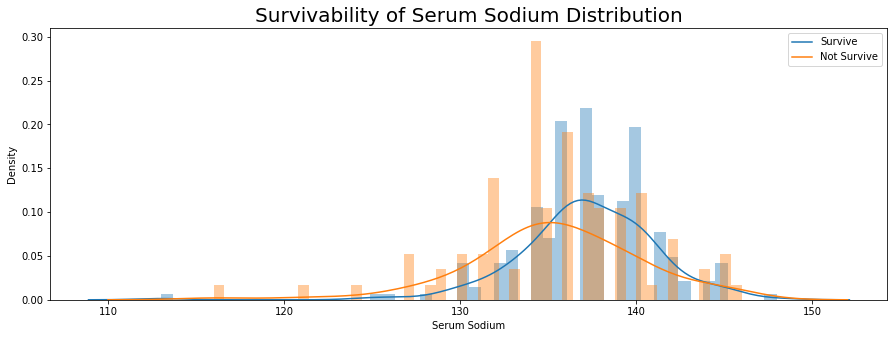

In [63]:
makedist(factor='serum_sodium',
         xlabel='Serum Sodium',
         title='Survivability of Serum Sodium Distribution')

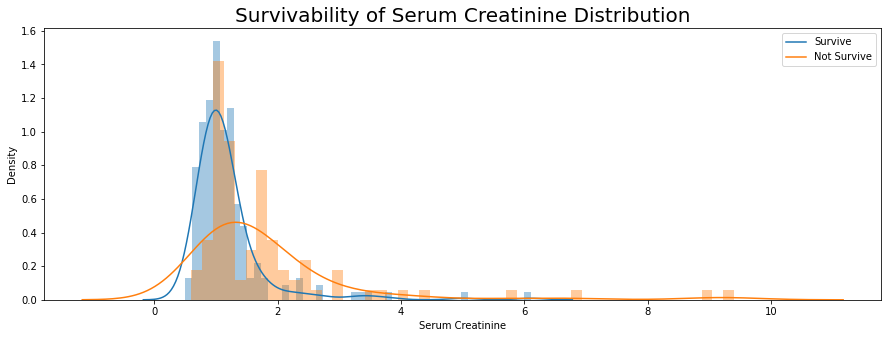

In [64]:
makedist(factor='serum_creatinine',
         xlabel='Serum Creatinine',
         title='Survivability of Serum Creatinine Distribution')

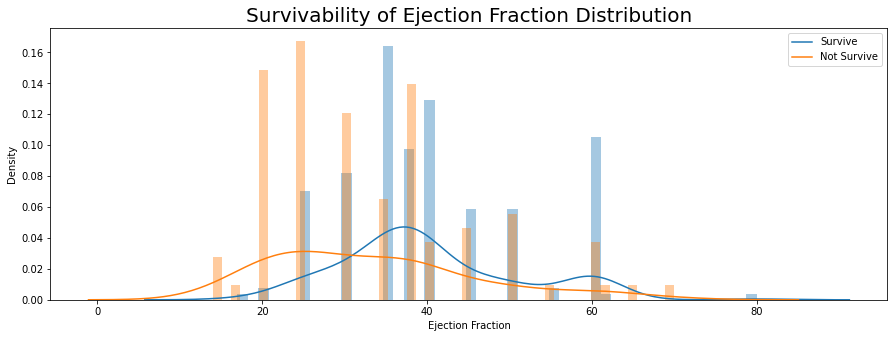

In [65]:
makedist(factor='ejection_fraction',
         xlabel='Ejection Fraction',
         title='Survivability of Ejection Fraction Distribution')

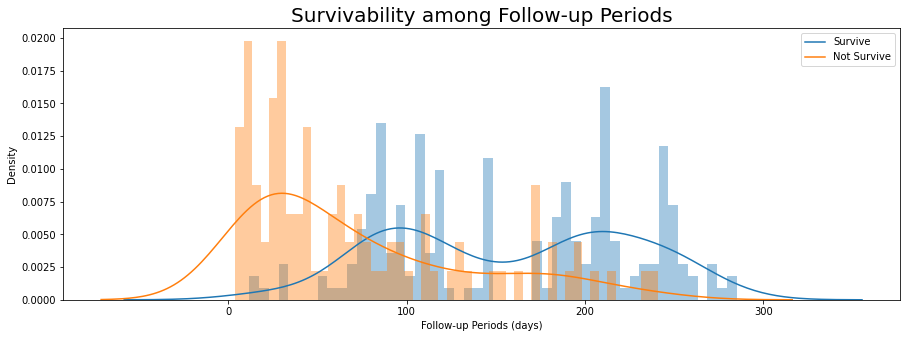

In [78]:
makedist(factor='time',
         xlabel='Follow-up Periods (days)',
         title='Survivability among Follow-up Periods')

## Significance Test

we perform T-Test to address which features are significanty different between survive and deceased.

In [66]:
import scipy as scp
continuous_data = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
print('T-test Result:')
for variable in continuous_data:
    death = df[df['DEATH_EVENT']==1][variable].values
    alive = df[df['DEATH_EVENT']==0][variable].values
    ttest,p = scp.stats.ttest_ind(death,alive,equal_var=False)
    if(p < 0.1):
        print(variable,' SIGNIFICANT DIFF.')
    else:
        print(variable,' NOT SIGNIFICANT DIFF.')
    print()

T-test Result:
creatinine_phosphokinase  NOT SIGNIFICANT DIFF.

ejection_fraction  SIGNIFICANT DIFF.

platelets  NOT SIGNIFICANT DIFF.

serum_creatinine  SIGNIFICANT DIFF.

serum_sodium  SIGNIFICANT DIFF.



There is significant differences in these features:  **ejection_fraction, serum_creatinine, dan serum_sodium**.

<div>
    <h1 style='font-size:30px'> B. Modelling </h1>
    <a class='anchor' id='model'></a>
</div>

In [70]:
# data preparation
from sklearn.model_selection import train_test_split,cross_val_score
# Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
# evaluation
from sklearn.metrics import classification_report,confusion_matrix

**QUICK VALIDATION USING CROSS VAL**

Max :  0.7855932203389832
Argmax :  0.1


<function matplotlib.pyplot.show(close=None, block=None)>

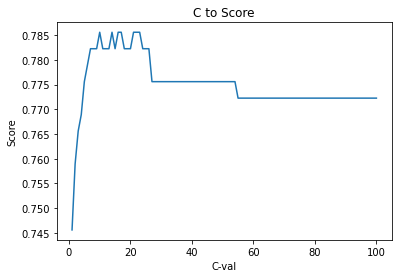

In [72]:
X = df.drop(['DEATH_EVENT'],axis=1)
y = df['DEATH_EVENT'].values
a = np.linspace(1,100,100)
scorearr = np.zeros(100)
for i in a:
    pipe = Pipeline([('scaling',StandardScaler()),('model',LogisticRegression(C=i/100))])
    scorearr[int(i-1)] = cross_val_score(pipe,X,y,cv=5).mean()
print('Max : ',scorearr.max())
print('Argmax : ',(np.argmax(scorearr)+1)/100)
# visualize
fig = plt.figure()
sns.lineplot(x=a,y=scorearr)
plt.xlabel('C-val')
plt.ylabel('Score')
plt.title('C to Score')
plt.show

according to scoring value, we choose the best at parameter **C = 1** with **0.81 accuracy**

In [73]:
# Train test splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=True)
print(X.shape)
print(y.shape)

(299, 12)
(299,)


In [75]:
pipe = Pipeline([('scaling',StandardScaler()),('model',LogisticRegression(C=1.0))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('model', LogisticRegression())])

In [77]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.86      0.75      0.80         8

    accuracy                           0.90        30
   macro avg       0.89      0.85      0.87        30
weighted avg       0.90      0.90      0.90        30



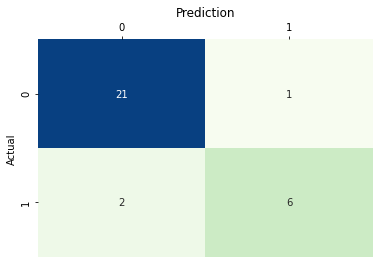

In [82]:
fig = plt.figure()
subplot = fig.add_subplot(111)
sns.heatmap(confusion_matrix(y_test,pipe.predict(X_test)),fmt="d",annot=True,cbar=False,cmap='GnBu',ax=subplot)
subplot.set_ylabel('Actual')
subplot.set_title('Prediction')
subplot.tick_params(labelbottom=False,labeltop=True,bottom=False,top=True)

Text(0.5, 0, 'Weights')

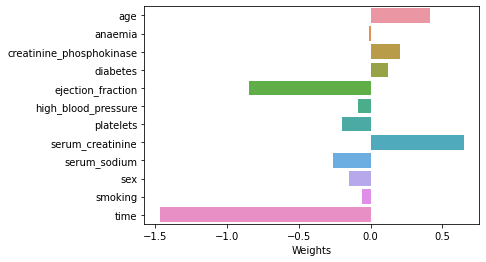

In [83]:
weights = pipe['model'].coef_
fig = plt.figure()
sns.barplot(y=X.columns,x=weights.flatten())
plt.xlabel('Weights')

The weight represent the contribution of a certain feature to the overall output. As we can see through the graph above, there are three bars that significantly higher than others. Those are **Follow-Up periods, Serum Creatinine, and Ejection Fraction.**

<div>
    <h1 style='font-size:30px'> C. Summary </h1>
    <a class='anchor' id='summary'></a>
</div>

We choose **_Logistic Regression_** as the model due to its capability to represent the output as probability rather than binary (Survived or Deceased). The accuration achieved as much as 90%. We also learn that there are three factors that likely causing the death of the patient, they are **Follow-Up periods, Serum Creatinine and Ejection Fraction**

<div style='background-color:black'>
    <h1> end</h1>
</div>

(c)

Facilitator:
1. Gusti Made Arya Sasmita, ST. MT
2. Widyadi Setiawan, ST., MT.

Author:
1. Cokorda Gede Sedana Yoga
2. I Gede Eka Sulistyawan

Fresh Graduate Academy <br>
Universitas Udayana <br>
Digitalent Scholarship 2020 <br>